In [1]:
pip install GoogleNews

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install newspaper3k

In [18]:
from GoogleNews import GoogleNews
from newspaper import Article
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
# Import modules
import matplotlib.pyplot as plt
import re
import string
import collections
from nltk.corpus import stopwords
import nltk
#Word Cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
#twitter sentiment analysis
import tweepy
from textblob import TextBlob
import seaborn as sns

In [4]:
googlenews = GoogleNews(lang='en', region='US')

In [5]:
googlenews = GoogleNews(start='012/01/2020',end='02/28/2022')

In [6]:
googlenews.get_news('used cars')

In [7]:
car_news=googlenews.result()
df=pd.DataFrame(car_news)
df

,title,desc,date,datetime,link,img,media,site
0,When Will Car Prices Come Back to Earth?,bookmark_border,9 hours ago,2022-03-08 10:04:06.652630,news.google.com/./articles/CBMiTWh0dHBzOi8vd3d...,https://lh3.googleusercontent.com/proxy/-D0Sjo...,None,Car and Driver
1,"Fast selling new, used cars",bookmark_border,4 days ago,2022-03-04 19:04:06.653026,news.google.com/./articles/CBMiN2h0dHBzOi8vd3d...,https://lh3.googleusercontent.com/proxy/0IHbSK...,None,NEWS10 ABC
2,You knew used car prices were high. Here's how...,bookmark_border,Feb 19,NaT,news.google.com/./articles/CAIiEGTLxgF82rqfRGi...,https://lh3.googleusercontent.com/proxy/PPa4o4...,None,USA TODAY
3,Rossen Reports: Check used cars for this befor...,bookmark_border,3 hours ago,2022-03-08 16:04:06.653844,news.google.com/./articles/CBMiXGh0dHBzOi8vd3d...,https://lh3.googleusercontent.com/proxy/Vsgj4P...,None,WYFF4 Greenville
4,Mutual Appreciation: Used Cars That Sell For M...,bookmark_border,Feb 7,NaT,news.google.com/./articles/CAIiEJGgqyR5zY3ZHtD...,https://lh3.googleusercontent.com/proxy/eN5cr-...,None,Forbes
...,...,...,...,...,...,...,...,...
87,Average age of vehicles hits all-time high: Ca...,bookmark_border,"Jun 14, 2021",2021-06-14 00:00:00.000000,news.google.com/./articles/CAIiEF3vp1jz-O_fsnl...,https://lh3.googleusercontent.com/proxy/iGsGvq...,None,USA TODAY
88,"Used-car prices are soaring, and Idahoans are ...",bookmark_border,Sep 16,NaT,news.google.com/./articles/CAIiEPML6x_DkqzQoXF...,https://lh3.googleusercontent.com/proxy/3hQwHX...,None,Idaho Statesman
89,It’s a bad time to buy used cars in Tampa Bay....,bookmark_border,Nov 19,NaT,news.google.com/./articles/CBMidmh0dHBzOi8vd3d...,https://lh3.googleusercontent.com/proxy/pSLT3-...,None,Tampa Bay Times
90,CT dealers scramble for used cars as prices jump,bookmark_border,Oct 16,NaT,news.google.com/./articles/CAIiEOSWNuCCdKVL75P...,https://lh3.googleusercontent.com/proxy/o1jZe2...,None,New Haven Register


In [8]:
text = df.title
text

0              When Will Car Prices Come Back to Earth?
1                           Fast selling new, used cars
2     You knew used car prices were high. Here's how...
3     Rossen Reports: Check used cars for this befor...
4     Mutual Appreciation: Used Cars That Sell For M...
                            ...                        
87    Average age of vehicles hits all-time high: Ca...
88    Used-car prices are soaring, and Idahoans are ...
89    It’s a bad time to buy used cars in Tampa Bay....
90     CT dealers scramble for used cars as prices jump
91           The most popular new and used cars in 2021
Name: title, Length: 92, dtype: object

In [9]:
title_list = df['title'].to_list()
title_list

['When Will Car Prices Come Back to Earth?',
 'Fast selling new, used cars',
 "You knew used car prices were high. Here's how outrageous it has become",
 'Rossen Reports: Check used cars for this before buying',
 'Mutual Appreciation: Used Cars That Sell For More Than New Ones',
 'As used-car prices surge, federal watchdog warns about illegal auto repossessions',
 'Sticker shock drives up car loans, monthly bills, and inflation index',
 'When do the used cars refresh in Gran Turismo 7?',
 'Which Used Cars Still Have Free Maintenance?',
 'Would You Buy A Used Car From This Economist? (Is “Inflation” Real?)',
 'Prices of new and used cars skyrocket during the pandemic',
 'Sticker Shock: Used Car Prices Skyrocket',
 'Why is NC buying new cars when so many sit unused?',
 'This is the average price of a used car in each state',
 'The best new and used cars for commuting',
 'Buying a New Car During the Chip Shortage: What You Need to Know',
 'Which are the fastest-selling new, used cars on t

In [10]:
title_string = ''.join(map(str, title_list))
title_string

"When Will Car Prices Come Back to Earth?Fast selling new, used carsYou knew used car prices were high. Here's how outrageous it has becomeRossen Reports: Check used cars for this before buyingMutual Appreciation: Used Cars That Sell For More Than New OnesAs used-car prices surge, federal watchdog warns about illegal auto repossessionsSticker shock drives up car loans, monthly bills, and inflation indexWhen do the used cars refresh in Gran Turismo 7?Which Used Cars Still Have Free Maintenance?Would You Buy A Used Car From This Economist? (Is “Inflation” Real?)Prices of new and used cars skyrocket during the pandemicSticker Shock: Used Car Prices SkyrocketWhy is NC buying new cars when so many sit unused?This is the average price of a used car in each stateThe best new and used cars for commutingBuying a New Car During the Chip Shortage: What You Need to KnowWhich are the fastest-selling new, used cars on the market?Certified Pre-Owned Cars: Forbes Says 2022 Is A Good Year To BuyThe bes

In [11]:
import re
for k in title_string.split("\n"):
    title_string = re.sub(r'[^a-zA-Z0-9]+', ' ', k)
title_string

'When Will Car Prices Come Back to Earth Fast selling new used carsYou knew used car prices were high Here s how outrageous it has becomeRossen Reports Check used cars for this before buyingMutual Appreciation Used Cars That Sell For More Than New OnesAs used car prices surge federal watchdog warns about illegal auto repossessionsSticker shock drives up car loans monthly bills and inflation indexWhen do the used cars refresh in Gran Turismo 7 Which Used Cars Still Have Free Maintenance Would You Buy A Used Car From This Economist Is Inflation Real Prices of new and used cars skyrocket during the pandemicSticker Shock Used Car Prices SkyrocketWhy is NC buying new cars when so many sit unused This is the average price of a used car in each stateThe best new and used cars for commutingBuying a New Car During the Chip Shortage What You Need to KnowWhich are the fastest selling new used cars on the market Certified Pre Owned Cars Forbes Says 2022 Is A Good Year To BuyThe best starting cars 

In [12]:
title_string = title_string.lower()

In [13]:
wordlist = str.split(title_string)
wordlist

['when',
 'will',
 'car',
 'prices',
 'come',
 'back',
 'to',
 'earth',
 'fast',
 'selling',
 'new',
 'used',
 'carsyou',
 'knew',
 'used',
 'car',
 'prices',
 'were',
 'high',
 'here',
 's',
 'how',
 'outrageous',
 'it',
 'has',
 'becomerossen',
 'reports',
 'check',
 'used',
 'cars',
 'for',
 'this',
 'before',
 'buyingmutual',
 'appreciation',
 'used',
 'cars',
 'that',
 'sell',
 'for',
 'more',
 'than',
 'new',
 'onesas',
 'used',
 'car',
 'prices',
 'surge',
 'federal',
 'watchdog',
 'warns',
 'about',
 'illegal',
 'auto',
 'repossessionssticker',
 'shock',
 'drives',
 'up',
 'car',
 'loans',
 'monthly',
 'bills',
 'and',
 'inflation',
 'indexwhen',
 'do',
 'the',
 'used',
 'cars',
 'refresh',
 'in',
 'gran',
 'turismo',
 '7',
 'which',
 'used',
 'cars',
 'still',
 'have',
 'free',
 'maintenance',
 'would',
 'you',
 'buy',
 'a',
 'used',
 'car',
 'from',
 'this',
 'economist',
 'is',
 'inflation',
 'real',
 'prices',
 'of',
 'new',
 'and',
 'used',
 'cars',
 'skyrocket',
 'during'

In [14]:
nltk.download('stopwords')

stopwords_english = stopwords.words('english')
print (stopwords_english)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ahmedelghazouani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
wordlist_final = [word for word in wordlist if not word in stopwords_english]
counts_final = collections.Counter(wordlist_final)

In [21]:
wordcount = pd.DataFrame(counts_final.most_common(100), columns=['words', 'count'])
wordcount.head(20)

,words,count
0,used,64
1,car,53
2,cars,30
3,prices,18
4,new,14
5,buy,12
6,buying,7
7,selling,4
8,best,4
9,shortage,4


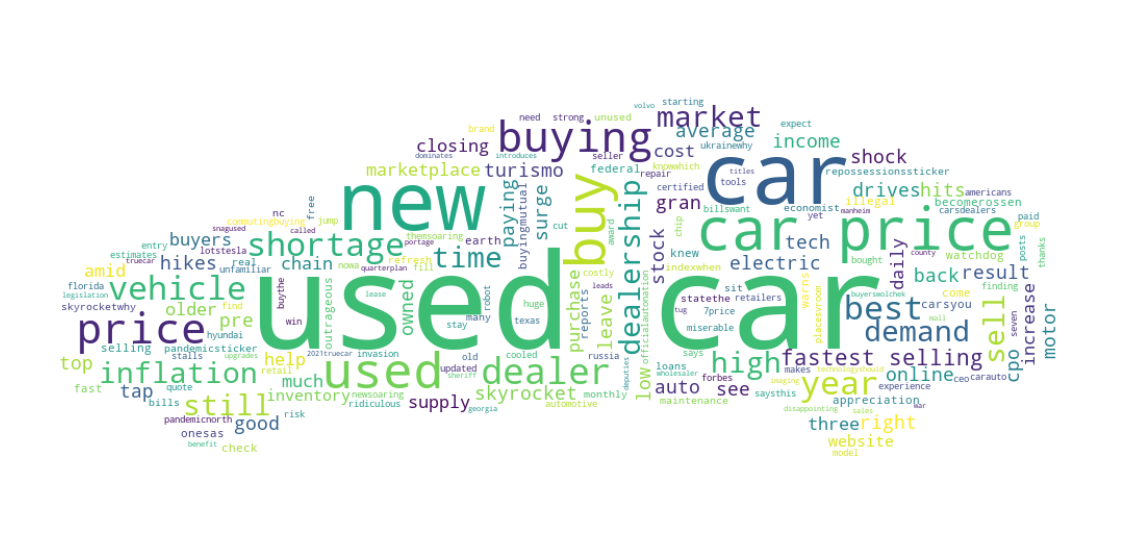

In [45]:
unique_string=(" ").join(wordlist_final)
mask = np.array(Image.open("car.jpg"))
wordcloud = WordCloud(width = 1000, height = 500, mask=mask, background_color = 'white').generate(unique_string)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("car_wordcloud"+".png", bbox_inches='tight')
plt.show()
plt.close()

# Twitter Sentiment Analysis

In [25]:
consumer_key = 'fWBQJWnNTqPyOw4uEVU315MxB'
consumer_secret = 'Ci6vbxzOsQ9Cwr1X5PuDyQ9aQNRylPfg4JRCSCMMDOgtQ85PBT'

access_token = '1050046371737296896-eB8yZPHSEFRflTCPFJpLeGWiL35Vpg'
access_token_secret = 'ecc3Rk2Fd891VSyZv4Ba2ZKzwF9Wsa2i7RkMRV5c7NZb6'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [35]:
car_tweets = api.search_tweets('used cars')

In [36]:
for tweet in car_tweets:
    print(tweet.text)

    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)
    print("")

RT @dmtrubman: I think a lot of people would be shocked to learn you used to be able to travel between nearby agricultural communities in t…
Sentiment(polarity=-0.09999999999999998, subjectivity=0.7125)

@ejjoe1 @deplorablita45 @Queendom916 @AnneGreen545 I can get more than what I payed for my Ford Raptor too.  It's b… https://t.co/Ow5N6m23Vd
Sentiment(polarity=0.5, subjectivity=0.5)

RT @mr_geff1: 2006
Toyota Camry 
XLE
Registered 
4 weeks used
Kitted &amp; pimped 
Price:3.150
Clean cars only🍀🍀 https://t.co/6uQNuyRoZe
Sentiment(polarity=0.3666666666666667, subjectivity=0.7000000000000001)

@prvrtz the way I used to think your name was shitzu dude 😭 but you look cool and forgive me,  I'd most definitely… https://t.co/s0nV4edcrc
Sentiment(polarity=0.425, subjectivity=0.575)

@RijhwaniHitesh @MarketRebels Lol you’re ignorant if you think oil is just used for cars
Sentiment(polarity=0.8, subjectivity=0.7)

@ShadowAlpha @Queendom916 @jasonsbishop @AnneGreen545 Those two cars are random, an

In [39]:
sentiment_list = [TextBlob(tweet.text) for tweet in car_tweets]

In [40]:
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_list]

In [41]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,-0.100000,RT @dmtrubman: I think a lot of people would b...
1,0.500000,@ejjoe1 @deplorablita45 @Queendom916 @AnneGree...
2,0.366667,RT @mr_geff1: 2006\nToyota Camry \nXLE\nRegist...
3,0.425000,@prvrtz the way I used to think your name was ...
4,0.800000,@RijhwaniHitesh @MarketRebels Lol you’re ignor...


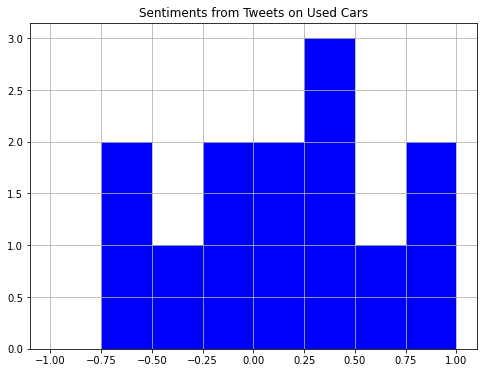

In [44]:
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiments from Tweets on Used Cars")
plt.show()